# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up

Exercises:

**1. Data Exploration and Understanding:**

• **Dataset Overview:**

1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
# reading the csv file
df = pd.read_csv("/content/drive/MyDrive/Assgn1/Assgn1.csv")
print(df)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

1. Load the dataset and display the first 10 rows.

In [ ]:
print(df.head(10)) # Displaying the first 10 rows

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identifying the number of rows and columns in the dataset.

In [ ]:
# identifying total rows & columns in dataset
df.shape

(143, 9)

3. listing all columns & their data types

In [ ]:
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


**• Basic Statistics:**

1. Calculate the mean, median, and standard deviation for the Score column.

2. Identify the country with the highest and lowest happiness scores.

Calculating mean


In [ ]:
mean = df["score"].mean()
print(mean)

5.52758041958042


Calculating median


In [ ]:
med = df["score"].median()
print(med)

5.785


Calculating standard deviation


In [ ]:
SD = df["score"].std()
print(SD)

1.1707165099442995


2. Identifying the country with the highest and lowest happiness scores.

In [8]:
# Max value with .loc & idxmax
Max = df.loc[df['score'].idxmax()]
print(Max['Country name'], Max ['score'])

# Min value with .loc & idxmax
Min = df.loc[df['score'].idxmin()]
print(Min['Country name'], Min ['score'])


Finland 7.741
Afghanistan 1.721


**Missing Values**:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

Checking if there are any missing values in the dataset. And displaying the total count for each column.

In [ ]:
# Checking missing values & displaying total count for each column
missing_val = df.isnull().sum()

# Displaying columns with missing values
print("Missing values in each column:\n", missing_val)

Missing values in each column:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting**:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

Filtering the dataset to show only the countries with a Score greater than 7.5.

In [9]:
# Filtering And Sorting
# Displaying countries with score > 7.5
filtered = df[df['score'] > 7.5]
print(filtered[['Country name', 'score']])

  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


Sorting the dataset by GDP per Capita in descending order and displaying the top 10 rows.

In [10]:
# Showing filtered rows in descending order
sorted_df = filtered.sort_values(by='Log GDP per capita', ascending = False)
print(sorted_df.head(10))


  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**Adding New Columns:**

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:


Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

Creating a new column called Happiness Category that categorizes countries into three categories based on their Score:

In [ ]:
# Creating function Cat_happy to apply the condition
def Cat_Happy(score):
  if score <4:
    return "Low"
  elif 4<= score <=6:
      return "Medium"
  else:
        return "High"

# Creating column Happiness_Category where [High, Medium, low] condition is applied.
df["Happiness_Category"] = df["score"].apply(Cat_Happy) # Calling the function cat_happy to apply the condition.

df[['Country name', 'Happiness_Category']]



,Country name,Happiness_Category
0,Finland,High
1,Denmark,High
2,Iceland,High
3,Sweden,High
4,Israel,High
...,...,...
138,Congo (Kinshasa),Low
139,Sierra Leone,Low
140,Lesotho,Low
141,Lebanon,Low


**2. Data Visualizations:**

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

a) Plotting Bar Plot: Top 10 Happiest Countries by Score


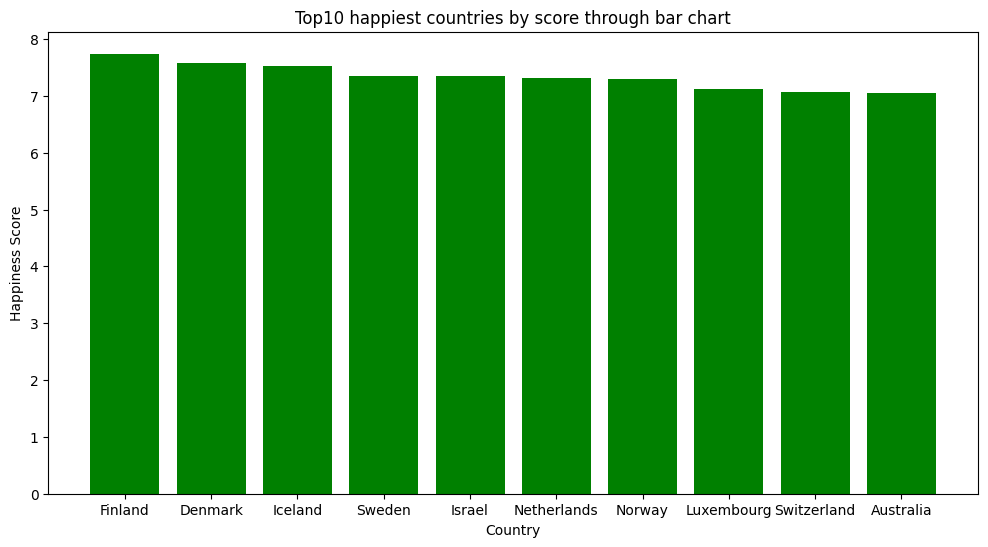

In [11]:
import matplotlib.pyplot as plt

sorted_value = df.sort_values(by='score', ascending = False).head(10)
plt.figure(figsize=(12,6));
plt.bar(sorted_value["Country name"], sorted_value["score"], color = "Green")
plt.title("Top10 happiest countries by score through bar chart")
plt.xlabel("Country")
plt.ylabel("Happiness Score")

# Showing the plot
plt.show()


b) Plotting Line Plot: Top 10 Unhappiest Countries by Score

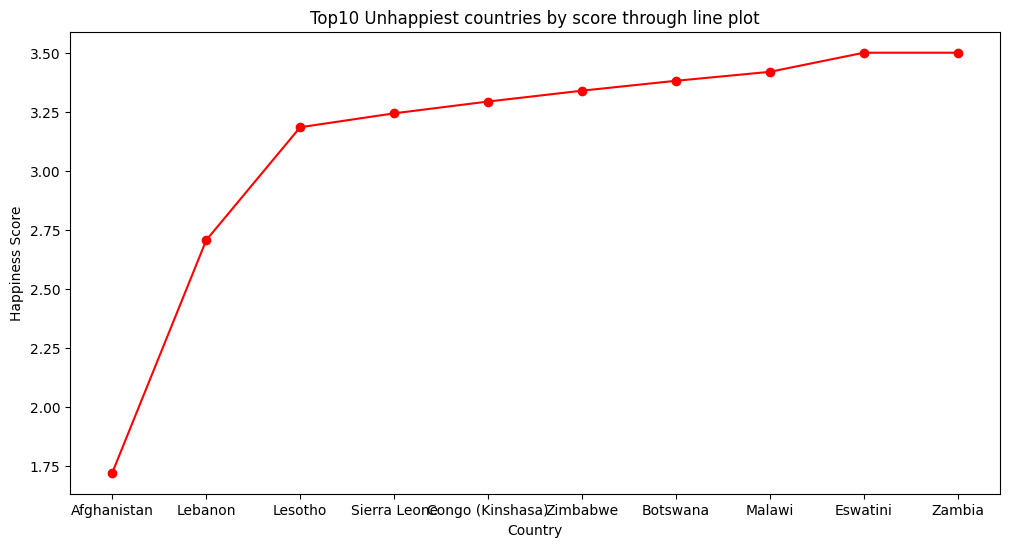

In [ ]:
unhappiest = df.sort_values(by='score', ascending = True).head(10)
plt.figure(figsize=(12,6));
plt.plot(unhappiest["Country name"], unhappiest["score"], marker = 'o', color = "Red")
plt.title("Top10 Unhappiest countries by score through line plot")
plt.xlabel("Country")
plt.ylabel("Happiness Score")

# Showing the plot
plt.show()

c) Plotting a histogram for the Score column


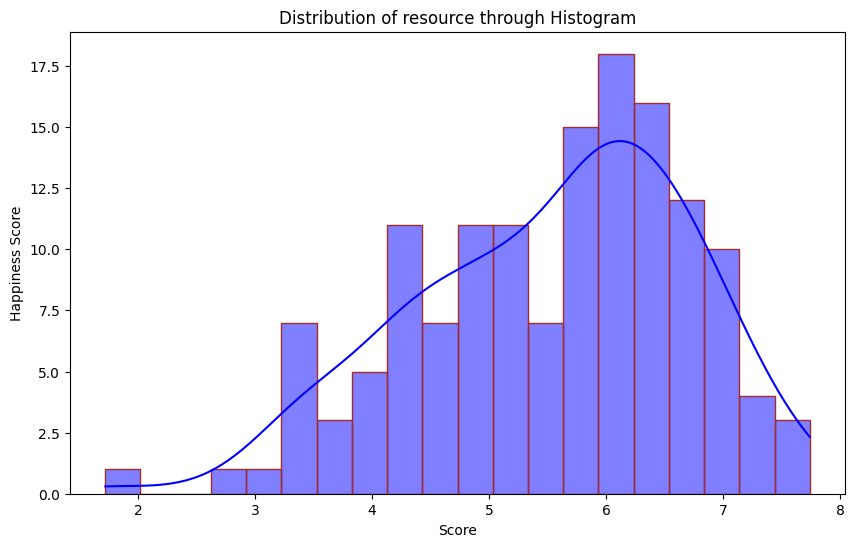

In [ ]:
plt.figure(figsize=(10,6));
sns.histplot(df["score"], bins=20, kde=True, color="Blue", edgecolor="brown")
plt.title("Distribution of resource through Histogram")
plt.xlabel("Score")
plt.ylabel("Happiness Score")

# Showing the plot
plt.show()

d) Plotting the scatter plot


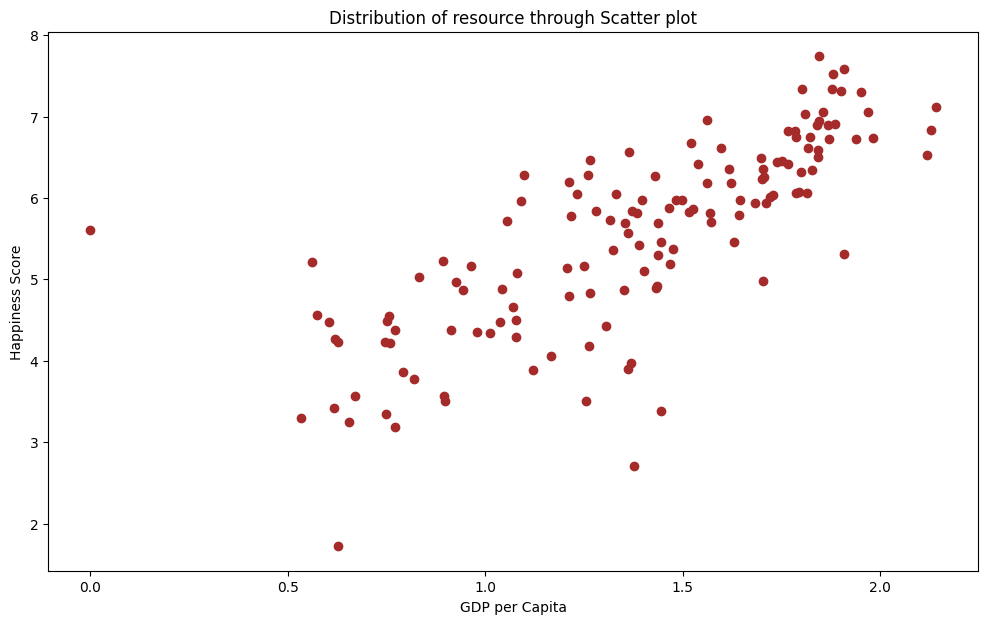

In [ ]:
plt.figure(figsize=(12,7));
plt.scatter(df["Log GDP per capita"], df["score"], color = "brown")
plt.title("Distribution of resource through Scatter plot")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")

# Showing the plot
plt.show()

# 3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:**bold text**

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]


2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

3. Save the filtered dataframe as separate CSV files for future use.

1. Defining the countries in South Asia with a list

In [16]:
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]





2. Using the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [18]:
south_asia_df = df[df["Country name"].isin(south_asia)]

3. Saving the filtered dataframe as separate CSV files for future use.

In [19]:
south_asia_df.to_csv("south_asia_dataset.csv", index=False)
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

**Task - 2 - Composite Score Ranking:**

Tasks:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

2. Rank the South Asian countries based on the Composite Score in descending order.

3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

Step 1: Calculating the Composite Score


In [20]:
import matplotlib.pyplot as plt # Importing the required module

south_asia_df["Composite Score"] = (
    0.40 * south_asia_df["Log GDP per capita"] +
    0.30 * south_asia_df["Social support"] +
    0.30 * south_asia_df["Healthy life expectancy"])
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  Composite Score  
92                       0.115                1.783           0.8159  
107                      0.074    

<ipython-input-20-f6989da674ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df["Composite Score"] = (


Step 2: Ranking countries based on Composite Score


In [ ]:
south_asia_df = south_asia_df.sort_values(by="Composite Score", ascending=False)
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
125                    0.417                         0.767       0.174   
107                    0.321                         0.542       0.144   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness_Category  \
92                       0.115                1.783             Medium   
125                      0.122                0.756             Medium   
107                      0.074                1.907             Medium   
142              

Step 3: Visualizing top 5 countries using a horizontal bar chart

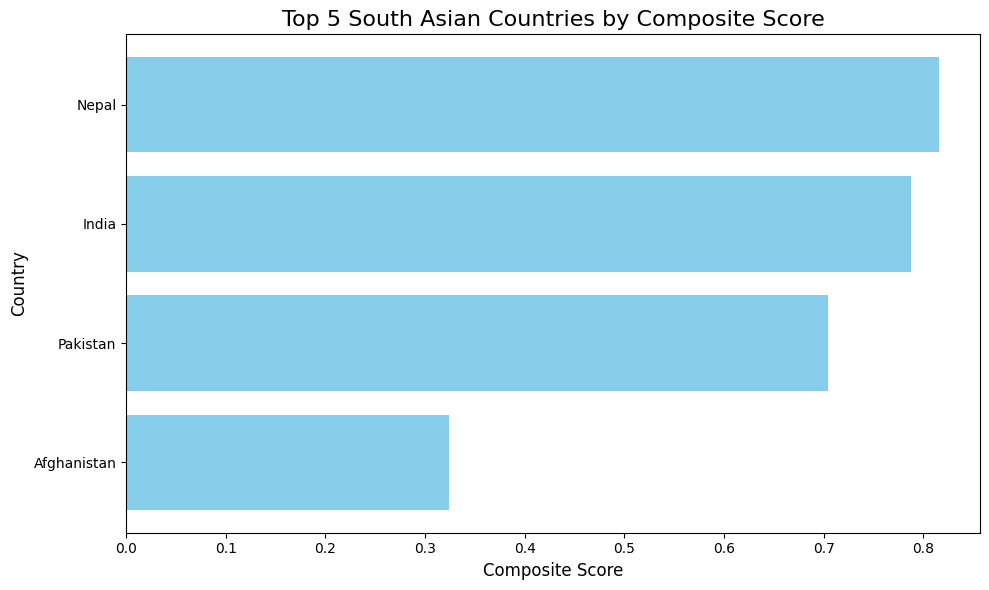

In [ ]:
top_5 = south_asia_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5["Country name"], top_5["Composite Score"], color="skyblue")
plt.title("Top 5 South Asian Countries by Composite Score", fontsize=16)
plt.xlabel("Composite Score", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Showing the bar chart
plt.show()

Step 4: Comparing Composite Score with Original Score using a scatter plot


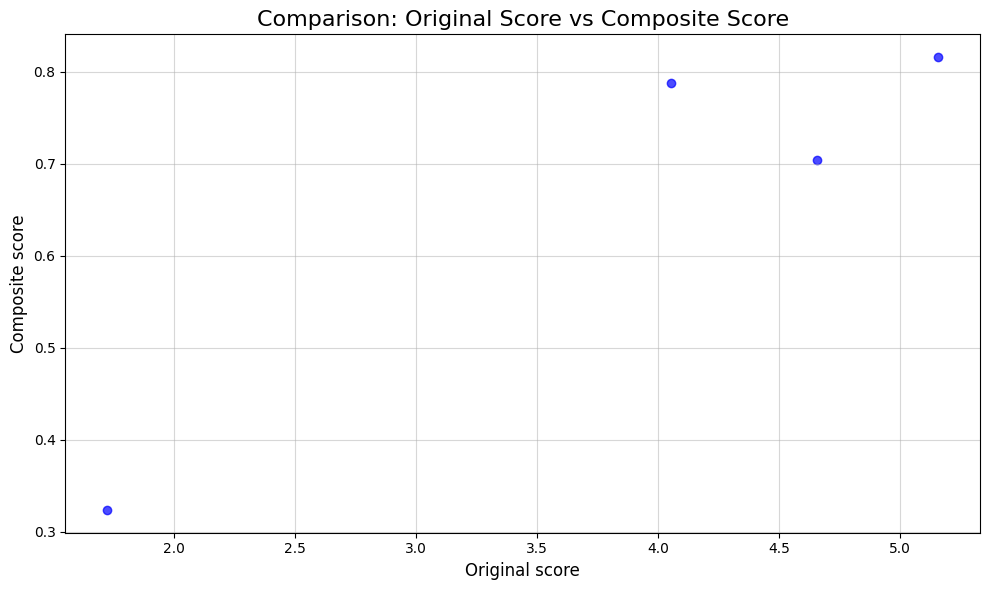

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df["score"], south_asia_df["Composite Score"], color="blue", alpha=0.7)
plt.title("Comparison: Original Score vs Composite Score", fontsize=16)
plt.xlabel("Original score", fontsize=12)
plt.ylabel("Composite score", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Showing the scatter plot
plt.show()

Step 5: Displaying the ranked DataFrame

In [ ]:
print(south_asia_df)

**Task - 3 - Outlier Detection:**

Tasks:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

2. Define outliers using the 1.5 × IQR rule.

3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

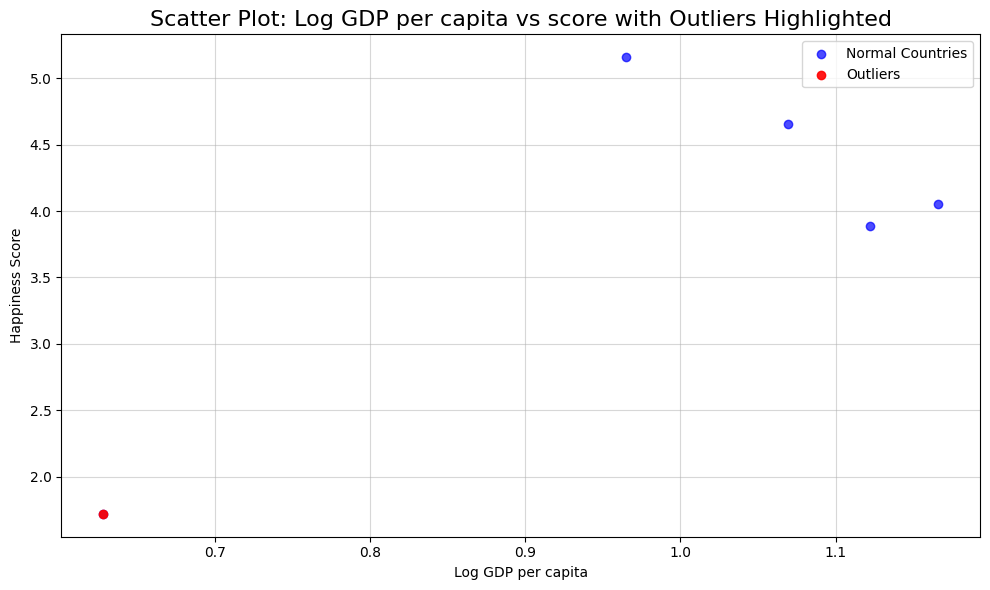

Outlier Countries:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual  Composite Score  
142                      0.088                0.672           0.3238  


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Defining a function to detect outliers using the 1.5 × IQR rule
def detect_outliers(data, column):
    Q1 = np.percentile(data[column], 25)  # First quartile (25th percentile)
    Q3 = np.percentile(data[column], 75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Step 2: Detecting outliers for Score and GDP per Capita
score_outliers = detect_outliers(south_asia_df, "score")
gdp_outliers = detect_outliers(south_asia_df, "Log GDP per capita")

# Combine outlier information into a single DataFrame for visualization
outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Step 3: Creating a scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df["Log GDP per capita"], south_asia_df["score"], color="blue", label="Normal Countries", alpha=0.7)
plt.scatter(outliers["Log GDP per capita"], outliers["score"], color="red", label="Outliers", alpha=0.9)
plt.title("Scatter Plot: Log GDP per capita vs score with Outliers Highlighted", fontsize=16)
plt.xlabel("Log GDP per capita", fontsize=10)
plt.ylabel("Happiness Score", fontsize=10)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Showing the plot
plt.show()

# Step 3: Output the outlier countries
print("Outlier Countries:")
print(outliers)

*Characteristics of Outliers:*

**Low Outliers:**

Countries like Afghanistan have very low scores and GDP per Capita, reflecting economic struggles, poor social support, and low life expectancy.


**High Outliers:**

Countries like Maldives have much higher GDP per Capita, likely driven by strong economic sectors like tourism, but their scores are moderate, aligning with regional averages.


*Impact on Regional Averages:*

**Score Averages:**

Low outliers (e.g., Afghanistan) pull down the regional happiness score average.

**GDP Averages:**

High outliers (e.g., Maldives) inflate the regional GDP average, masking struggles of lower-GDP countries.


**Task - 4 - Exploring Trends Across Metrics:**

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

2. Create scatter plots with trendlines for these metrics against the Score.

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Correlation between Freedom to Make Life Choices and Score: 0.80
Correlation between Generosity and Score: 0.88


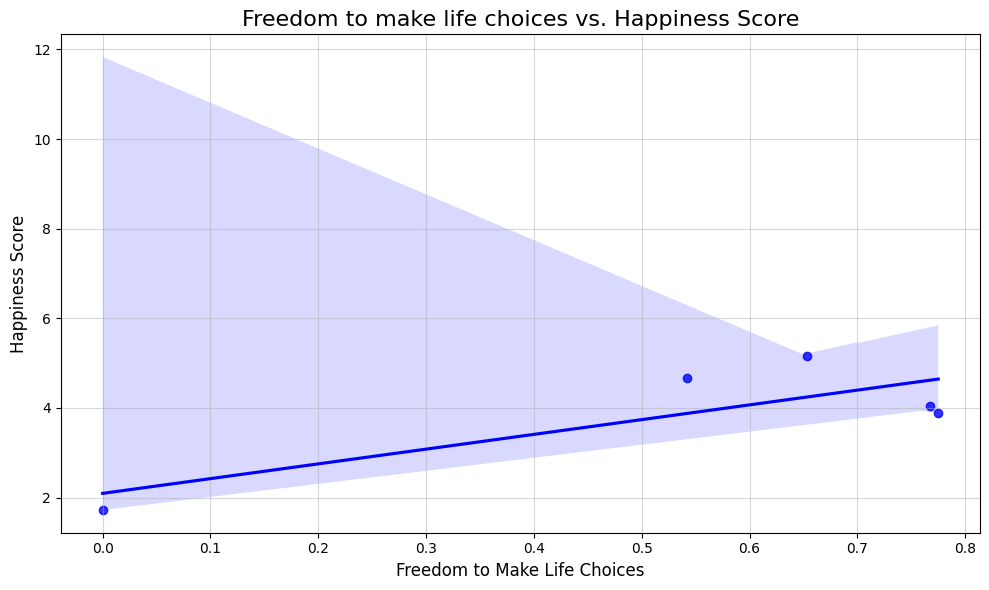

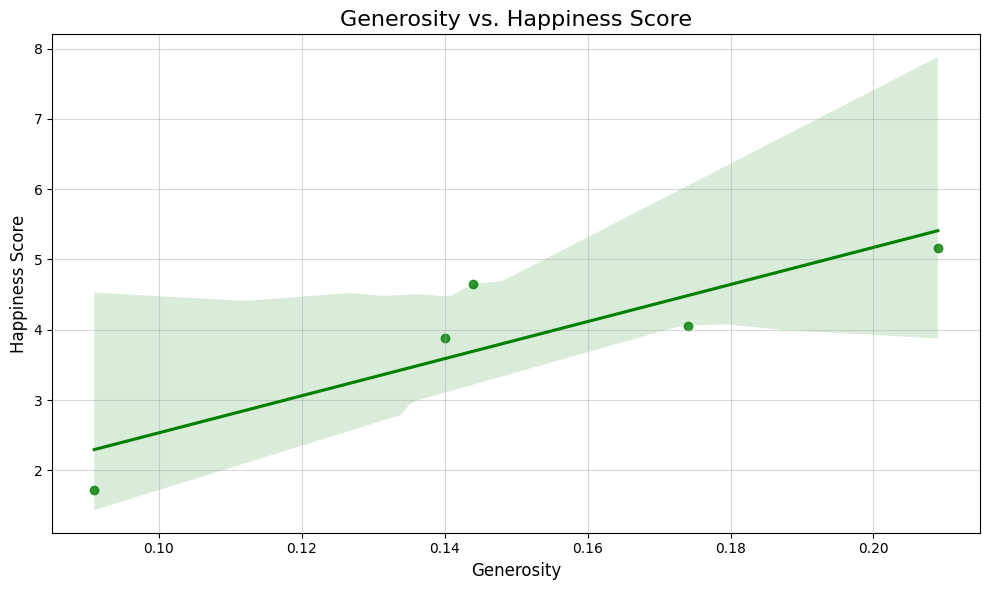

Strongest relationship is with Generosity.
Weakest relationship is with Freedom to make life choices.


In [ ]:
import seaborn as sns
from scipy.stats import pearsonr

# Step 2: Calculate the Pearson correlation coefficients
freedom_corr, _ = pearsonr(south_asia_df["Freedom to make life choices"], south_asia_df["score"])
generosity_corr, _ = pearsonr(south_asia_df["Generosity"], south_asia_df["score"])

print(f"Correlation between Freedom to Make Life Choices and Score: {freedom_corr:.2f}")
print(f"Correlation between Generosity and Score: {generosity_corr:.2f}")

# Step 3: Create scatter plots with trendlines for these metrics against the Score

# Scatter plot for Freedom to Make Life Choices vs. Score
plt.figure(figsize=(10, 6))
sns.regplot(x="Freedom to make life choices", y="score", data=south_asia_df, color="blue")
plt.title("Freedom to make life choices vs. Happiness Score", fontsize=16)
plt.xlabel("Freedom to Make Life Choices", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot for Generosity vs. Score
plt.figure(figsize=(10, 6))
sns.regplot(x="Generosity", y="score", data=south_asia_df, color="green")
plt.title("Generosity vs. Happiness Score", fontsize=16)
plt.xlabel("Generosity", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Step 4: Discussing the strongest and weakest relationships
strongest_metric = "Freedom to make life choices" if abs(freedom_corr) > abs(generosity_corr) else "Generosity"
weakest_metric = "Generosity" if strongest_metric == "Freedom to make life choices" else "Freedom to make life choices"

print(f"Strongest relationship is with {strongest_metric}.")
print(f"Weakest relationship is with {weakest_metric}.")

Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

2. Rank the South Asian countries by this gap in both ascending and descending order.

3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

<ipython-input-11-995b01668eb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df["GDP-Score Gap"] = south_asia_df["Log GDP per capita"] - south_asia_df["score"]


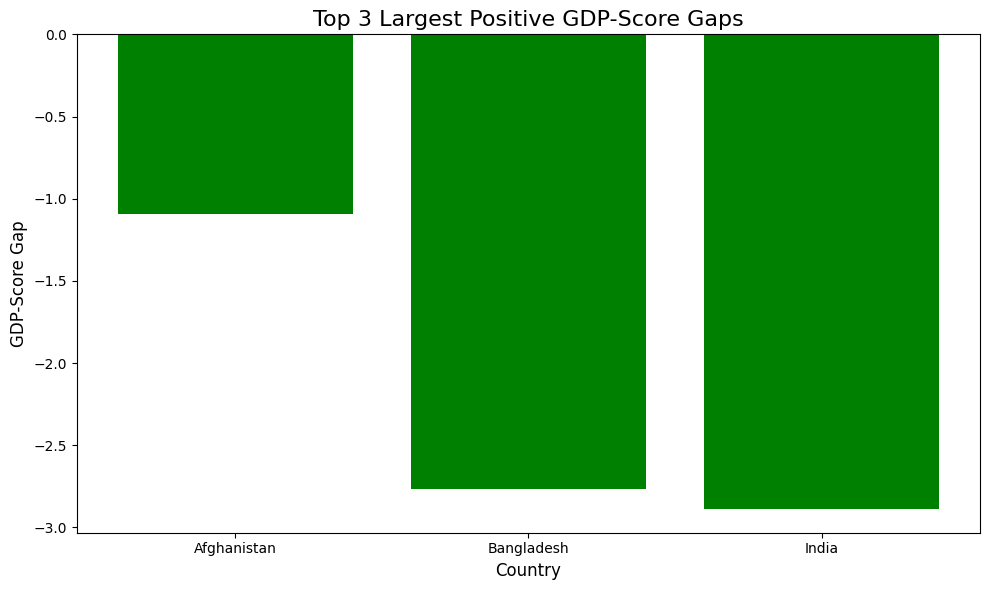

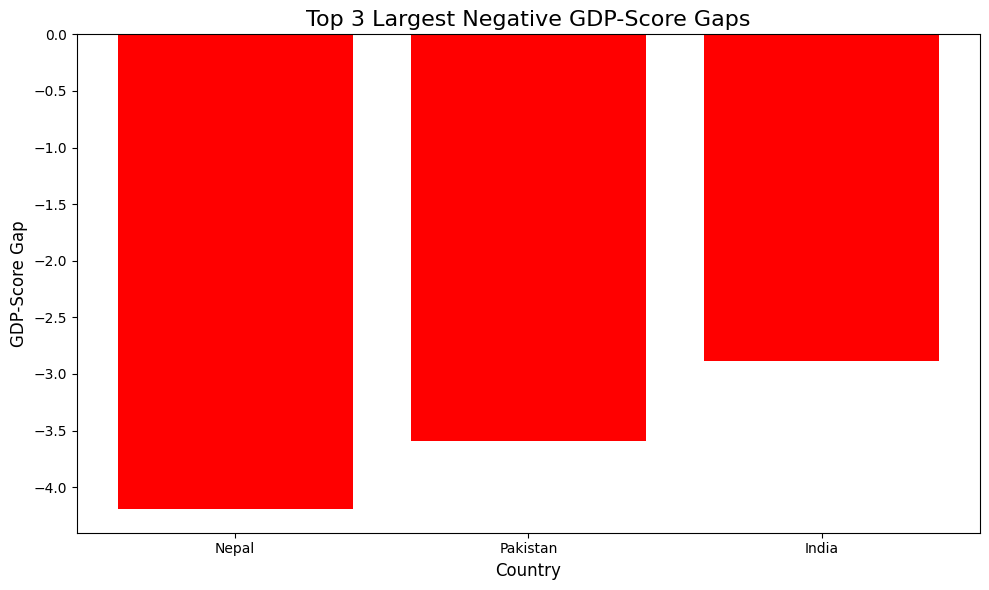

Top 3 Positive Gaps:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628           0.000   
128   Bangladesh  3.886               1.122           0.249   
125        India  4.054               1.166           0.653   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                         0.000       0.091   
128                    0.513                         0.775       0.140   
125                    0.417                         0.767       0.174   

     Perceptions of corruption  Dystopia + residual  GDP-Score Gap  
142                      0.088                0.672         -1.093  
128                      0.167                0.919         -2.764  
125                      0.122                0.756         -2.888  

Top 3 Negative Gaps:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107  

In [ ]:
# Step 1: Adding a new column for GDP-Score Gap
south_asia_df["GDP-Score Gap"] = south_asia_df["Log GDP per capita"] - south_asia_df["score"]

# Step 2: Rank countries by GDP-Score Gap in ascending and descending order
ascending_gap = south_asia_df.sort_values(by="GDP-Score Gap", ascending=True)
descending_gap = south_asia_df.sort_values(by="GDP-Score Gap", ascending=False)

# Step 3: Highlight the top 3 countries with the largest positive and negative gaps
top_positive_gaps = descending_gap.head(3)
top_negative_gaps = ascending_gap.head(3)

# Plot bar chart for positive gaps
plt.figure(figsize=(10, 6))
plt.bar(top_positive_gaps["Country name"], top_positive_gaps["GDP-Score Gap"], color="green")
plt.title("Top 3 Largest Positive GDP-Score Gaps", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP-Score Gap", fontsize=12)
plt.tight_layout()
plt.show()

# Plot bar chart for negative gaps
plt.figure(figsize=(10, 6))
plt.bar(top_negative_gaps["Country name"], top_negative_gaps["GDP-Score Gap"], color="red")
plt.title("Top 3 Largest Negative GDP-Score Gaps", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP-Score Gap", fontsize=12)
plt.tight_layout()
plt.show()

# Step 4: Analysis of reasons behind gaps
print("Top 3 Positive Gaps:")
print(top_positive_gaps)

print("\nTop 3 Negative Gaps:")
print(top_negative_gaps)

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Step 1: Define the datasets for South Asia and the Middle East
south_asia_data = {
    "Country name": ["Afghanistan", "Bangladesh", "Bhutan", "India",
                     "Maldives", "Nepal", "Pakistan", "Sri Lanka"],
    "Score": [2.523, 4.694, 4.964, 5.0, 5.198, 4.534, 4.278, 4.325],
    "GDP per Capita": [0.350, 0.540, 0.482, 0.650, 0.717, 0.479, 0.402, 0.561],
    "Social Support": [0.517, 0.794, 0.864, 0.785, 0.947, 0.689, 0.657, 0.831],
    "Healthy Life Expectancy": [0.303, 0.485, 0.494, 0.606, 0.717, 0.529, 0.424, 0.671],
    "Freedom to Make Life Choices": [0.234, 0.520, 0.654, 0.789, 0.862, 0.641, 0.512, 0.738],
    "Generosity": [0.126, 0.341, 0.532, 0.413, 0.652, 0.439, 0.276, 0.525],
}

middle_east_data = {
    "Country name": ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
                     "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                     "Syria", "United Arab Emirates", "Yemen"],
    "Score": [6.199, 4.548, 4.497, 7.157, 4.906, 6.106, 4.584, 5.375, 4.456,
              6.375, 6.494, 3.462, 6.825, 3.410],
    "GDP per Capita": [1.454, 0.798, 0.657, 1.276, 0.857, 1.554, 0.850, 1.251,
                       0.689, 1.684, 1.561, 0.494, 1.691, 0.287],
    "Social Support": [0.937, 0.734, 0.573, 1.232, 0.847, 1.336, 0.731, 1.152,
                       0.743, 1.350, 1.357, 0.402, 1.476, 0.287],
    "Healthy Life Expectancy": [0.811, 0.685, 0.574, 0.864, 0.755, 0.808, 0.640,
                                0.817, 0.623, 0.871, 0.810, 0.495, 0.879, 0.349],
    "Freedom to Make Life Choices": [0.792, 0.521, 0.459, 0.919, 0.748, 0.925,
                                     0.652, 0.896, 0.641, 0.898, 0.886, 0.352, 0.971, 0.245],
    "Generosity": [0.246, 0.125, 0.210, 0.213, 0.208, 0.256, 0.211, 0.202,
                   0.198, 0.171, 0.134, 0.216, 0.139, 0.136],
}

south_asia_df = pd.DataFrame(south_asia_data)
middle_east_df = pd.DataFrame(middle_east_data)

# Step 2: Descriptive Statistics
# Calculate mean and standard deviation for Score
south_asia_stats = south_asia_df["Score"].agg(["mean", "std"]).rename("South Asia")
middle_east_stats = middle_east_df["Score"].agg(["mean", "std"]).rename("Middle East")

stats_comparison = pd.concat([south_asia_stats, middle_east_stats], axis=1)

print("Descriptive Statistics for Score:")
print(stats_comparison)

# Step 3: Top and Bottom Performers
# Top 3 and Bottom 3 in each region
south_asia_top_bottom = pd.concat([south_asia_df.nlargest(3, "Score"), south_asia_df.nsmallest(3, "Score")])
middle_east_top_bottom = pd.concat([middle_east_df.nlargest(3, "Score"), middle_east_df.nsmallest(3, "Score")])

# Plot bar charts
plt.figure(figsize=(10, 6))
plt.bar(south_asia_top_bottom["Country name"], south_asia_top_bottom["Score"], color="blue")
plt.title("South Asia: Top and Bottom Performers", fontsize=16)
plt.ylabel("Happiness Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(middle_east_top_bottom["Country name"], middle_east_top_bottom["Score"], color="green")
plt.title("Middle East: Top and Bottom Performers", fontsize=16)
plt.ylabel("Happiness Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Metric Comparisons
# Grouped bar charts for key metrics
metrics = ["GDP per Capita", "Social Support", "Healthy Life Expectancy"]

# Calculate mean for each region
south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({"South Asia": south_asia_means, "Middle East": middle_east_means})

comparison_df.plot(kind="bar", figsize=(10, 6), color=["blue", "green"])
plt.title("Metric Comparisons Between South Asia and Middle East", fontsize=16)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 5: Happiness Disparity
# Range and coefficient of variation
south_asia_range = south_asia_df["Score"].max() - south_asia_df["Score"].min()
middle_east_range = middle_east_df["Score"].max() - middle_east_df["Score"].min()

south_asia_cv = south_asia_df["Score"].std() / south_asia_df["Score"].mean()
middle_east_cv = middle_east_df["Score"].std() / middle_east_df["Score"].mean()

disparity = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Range": [south_asia_range, middle_east_range],
    "Coefficient of Variation": [south_asia_cv, middle_east_cv],
})

print("Happiness Disparity Analysis:")
print(disparity)

# Step 6: Correlation Analysis
metrics_to_correlate = ["Freedom to Make Life Choices", "Generosity"]

for region, df in [("South Asia", south_asia_df), ("Middle East", middle_east_df)]:
    print(f"\nCorrelation Analysis for {region}:")
    for metric in metrics_to_correlate:
        corr, _ = pearsonr(df[metric], df["Score"])
        print(f"  Correlation between {metric} and Score: {corr:.2f}")

    # Scatter plots
    for metric in metrics_to_correlate:
        plt.figure(figsize=(8, 5))
        sns.regplot(x=metric, y="Score", data=df, scatter_kws={"color": "blue" if region == "South Asia" else "green"}, line_kws={"color": "red"})
        plt.title(f"{region}: {metric} vs. Score", fontsize=14)
        plt.xlabel(metric, fontsize=12)
        plt.ylabel("Score", fontsize=12)
        plt.tight_layout()
        plt.show()

# Step 7: Outlier Detection
# Identify and plot outliers
for region, df in [("South Asia", south_asia_df), ("Middle East", middle_east_df)]:
    Q1 = df["Score"].quantile(0.25)
    Q3 = df["Score"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df["Score"] < lower_bound) | (df["Score"] > upper_bound)]
    print(f"\nOutliers in {region}:")
    print(outliers)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df["GDP per Capita"], df["Score"], color="blue" if region == "South Asia" else "green", label="Normal")
    plt.scatter(outliers["GDP per Capita"], outliers["Score"], color="red", label="Outliers")
    plt.title(f"{region}: Outliers Based on Score and GDP per Capita", fontsize=16)
    plt.xlabel("GDP per Capita", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Step 8: Boxplots for Score Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=[south_asia_df["Score"], middle_east_df["Score"]], palette=["blue", "green"])
plt.title("Score Distribution: South Asia vs Middle East", fontsize=16)
plt.xticks([0, 1], ["South Asia", "Middle East"], fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:
# Step 1: Define the datasets for South Asia and the Middle East
south_asia_data = {
    "Country name": ["Afghanistan", "Bangladesh", "Bhutan", "India",
                     "Maldives", "Nepal", "Pakistan", "Sri Lanka"],
    "Score": [2.523, 4.694, 4.964, 5.0, 5.198, 4.534, 4.278, 4.325],
    "GDP per Capita": [0.350, 0.540, 0.482, 0.650, 0.717, 0.479, 0.402, 0.561],
    "Social Support": [0.517, 0.794, 0.864, 0.785, 0.947, 0.689, 0.657, 0.831],
    "Healthy Life Expectancy": [0.303, 0.485, 0.494, 0.606, 0.717, 0.529, 0.424, 0.671],
    "Freedom to Make Life Choices": [0.234, 0.520, 0.654, 0.789, 0.862, 0.641, 0.512, 0.738],
    "Generosity": [0.126, 0.341, 0.532, 0.413, 0.652, 0.439, 0.276, 0.525],
}

middle_east_data = {
    "Country name": ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
                     "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                     "Syria", "United Arab Emirates", "Yemen"],
    "Score": [6.199, 4.548, 4.497, 7.157, 4.906, 6.106, 4.584, 5.375, 4.456,
              6.375, 6.494, 3.462, 6.825, 3.410],
    "GDP per Capita": [1.454, 0.798, 0.657, 1.276, 0.857, 1.554, 0.850, 1.251,
                       0.689, 1.684, 1.561, 0.494, 1.691, 0.287],
    "Social Support": [0.937, 0.734, 0.573, 1.232, 0.847, 1.336, 0.731, 1.152,
                       0.743, 1.350, 1.357, 0.402, 1.476, 0.287],
    "Healthy Life Expectancy": [0.811, 0.685, 0.574, 0.864, 0.755, 0.808, 0.640,
                                0.817, 0.623, 0.871, 0.810, 0.495, 0.879, 0.349],
    "Freedom to Make Life Choices": [0.792, 0.521, 0.459, 0.919, 0.748, 0.925,
                                     0.652, 0.896, 0.641, 0.898, 0.886, 0.352, 0.971, 0.245],
    "Generosity": [0.246, 0.125, 0.210, 0.213, 0.208, 0.256, 0.211, 0.202,
                   0.198, 0.171, 0.134, 0.216, 0.139, 0.136],
}

south_asia_df = pd.DataFrame(south_asia_data)
middle_east_df = pd.DataFrame(middle_east_data)

Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

=> **Step 1: Descriptive Statistics**
**Calculating mean and standard deviation for Score**

In [ ]:
south_asia_stats = south_asia_df["Score"].agg(["mean", "std"]).rename("South Asia")
middle_east_stats = middle_east_df["Score"].agg(["mean", "std"]).rename("Middle East")

stats_comparison = pd.concat([south_asia_stats, middle_east_stats], axis=1)

print("Descriptive Statistics for Score:")
print(stats_comparison)


Descriptive Statistics for Score:
      South Asia  Middle East
mean    4.439500     5.313857
std     0.840956     1.220246


2. Top and Bottom Performers:

•  Identify the top 3 and bottom 3 countries in each region based on the score.

•  Plot bar charts comparing these charts.

-> **Step 2: Top and Bottom Performers**
**Top 3 and Bottom 3 in each region**

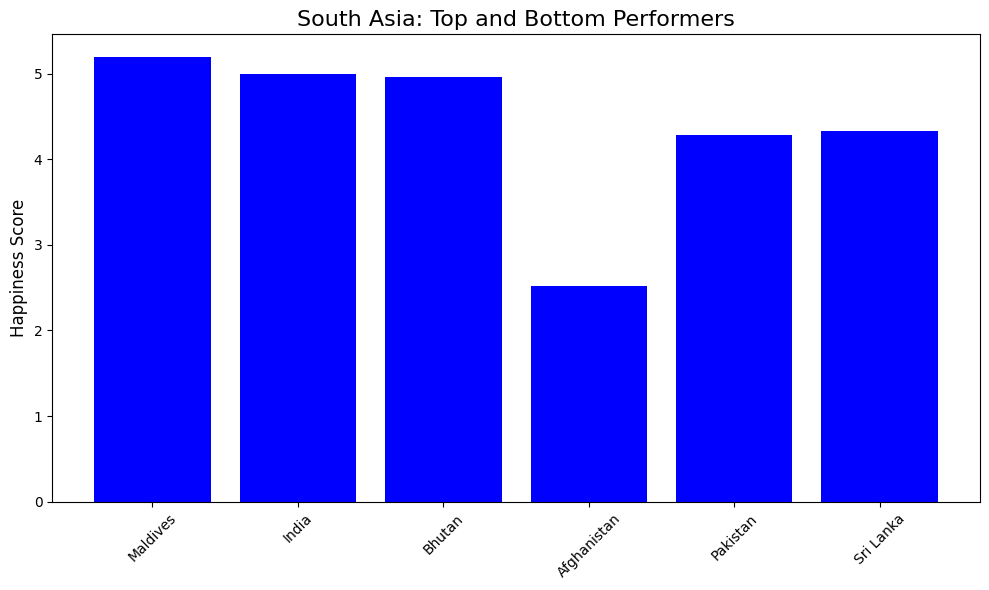

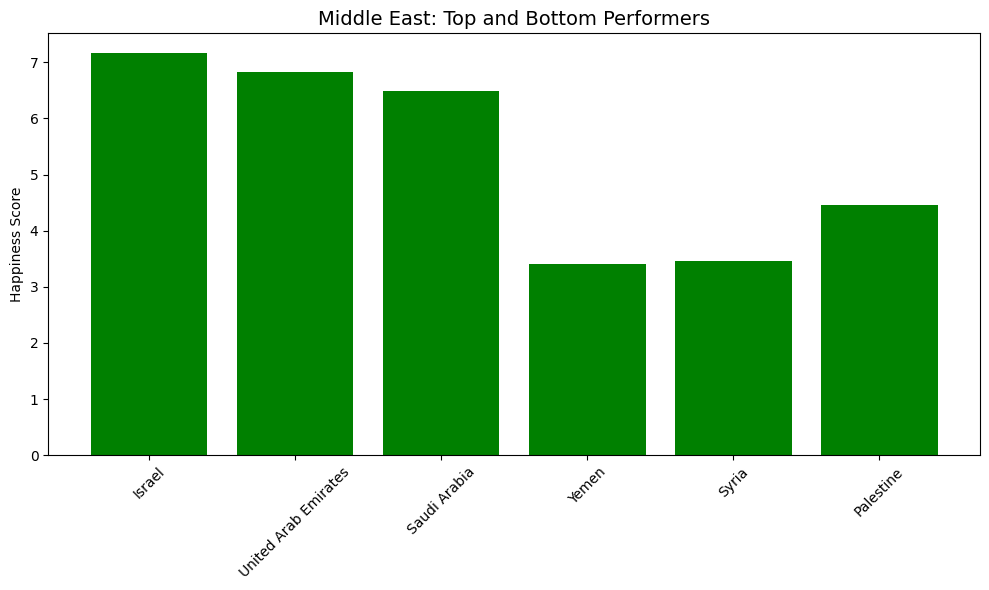

In [ ]:
south_asia_top_bottom = pd.concat([south_asia_df.nlargest(3, "Score"), south_asia_df.nsmallest(3, "Score")])
middle_east_top_bottom = pd.concat([middle_east_df.nlargest(3, "Score"), middle_east_df.nsmallest(3, "Score")])

# Plotting bar charts
plt.figure(figsize=(10, 6))
plt.bar(south_asia_top_bottom["Country name"], south_asia_top_bottom["Score"], color="blue")
plt.title("South Asia: Top and Bottom Performers", fontsize=16)
plt.ylabel("Happiness Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(middle_east_top_bottom["Country name"], middle_east_top_bottom["Score"], color="green")
plt.title("Middle East: Top and Bottom Performers", fontsize=14)
plt.ylabel("Happiness Score", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?


=> **Step 3: Metric Comparisons**

**Grouping bar charts for key metrics**

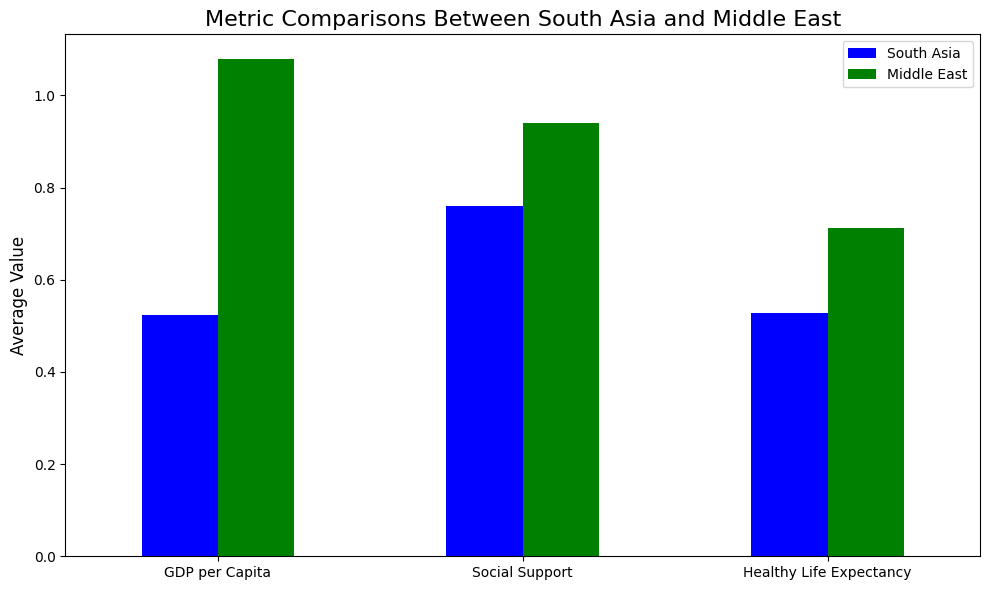

In [ ]:

metrics = ["GDP per Capita", "Social Support", "Healthy Life Expectancy"]

# Calculate mean for each region
south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({"South Asia": south_asia_means, "Middle East": middle_east_means})

comparison_df.plot(kind="bar", figsize=(10, 6), color=["blue", "green"])
plt.title("Metric Comparisons Between South Asia and Middle East", fontsize=16)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

=> **Range and coefficient of variation**

In [ ]:
south_asia_range = south_asia_df["Score"].max() - south_asia_df["Score"].min()
middle_east_range = middle_east_df["Score"].max() - middle_east_df["Score"].min()

south_asia_cv = south_asia_df["Score"].std() / south_asia_df["Score"].mean()
middle_east_cv = middle_east_df["Score"].std() / middle_east_df["Score"].mean()

disparity = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Range": [south_asia_range, middle_east_range],
    "Coefficient of Variation": [south_asia_cv, middle_east_cv],
})

print("Happiness Disparity Analysis:")
print(disparity)

Happiness Disparity Analysis:
        Region  Range  Coefficient of Variation
0   South Asia  2.675                  0.189426
1  Middle East  3.747                  0.229635


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.


Correlation Analysis for South Asia:
  Correlation between Freedom to Make Life Choices and Score: 0.87
  Correlation between Generosity and Score: 0.81


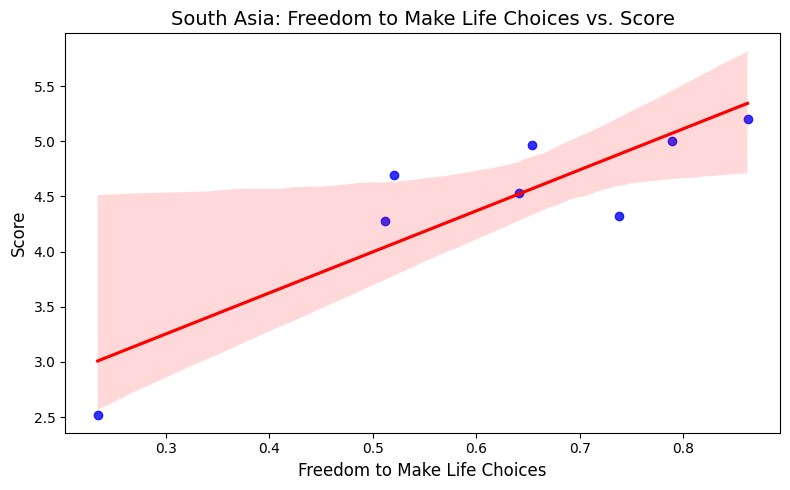

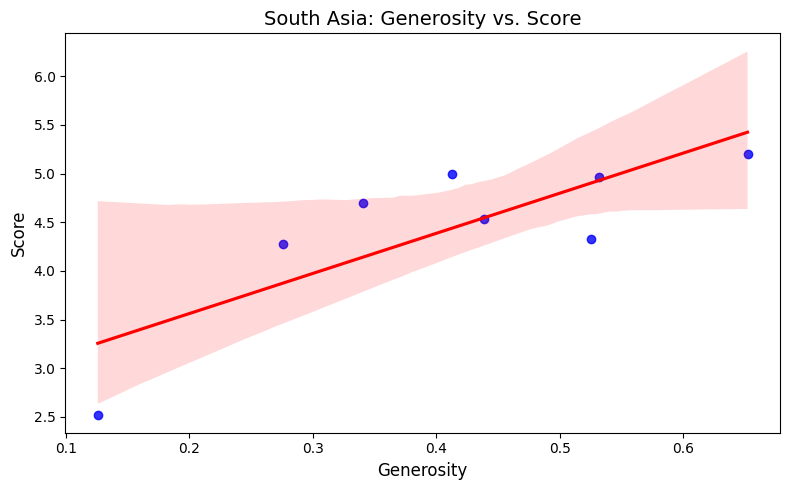


Correlation Analysis for Middle East:
  Correlation between Freedom to Make Life Choices and Score: 0.92
  Correlation between Generosity and Score: 0.06


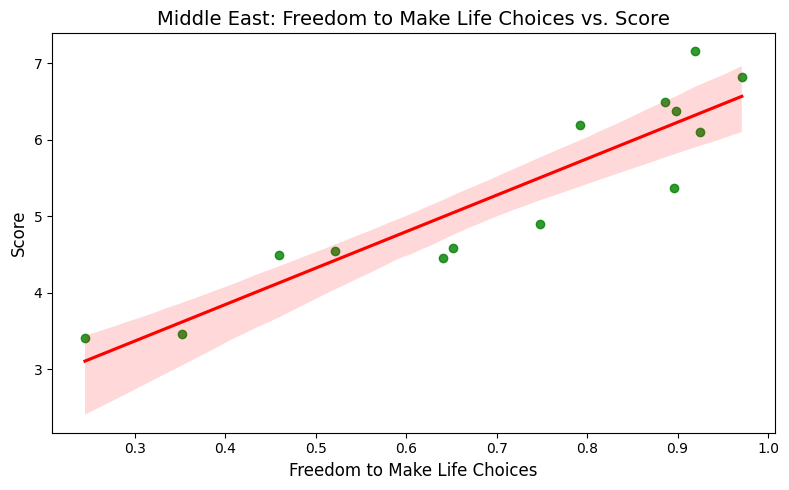

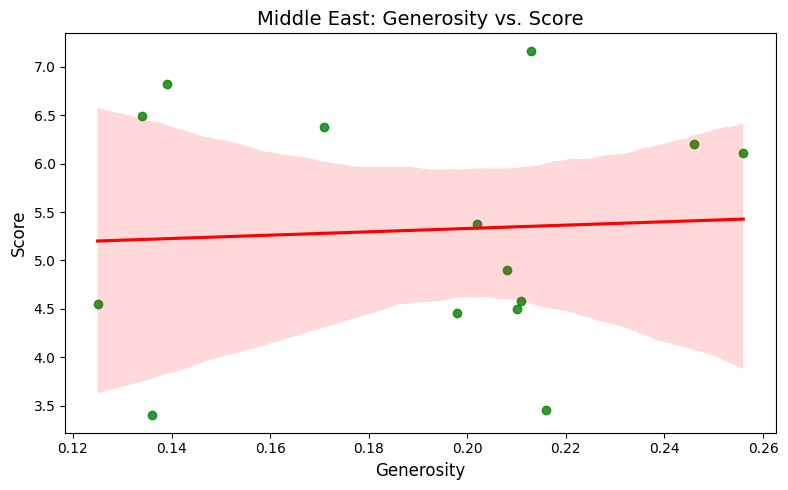

In [ ]:
metrics_to_correlate = ["Freedom to Make Life Choices", "Generosity"]

for region, df in [("South Asia", south_asia_df), ("Middle East", middle_east_df)]:
    print(f"\nCorrelation Analysis for {region}:")
    for metric in metrics_to_correlate:
        corr, _ = pearsonr(df[metric], df["Score"])
        print(f"  Correlation between {metric} and Score: {corr:.2f}")

    # Scatter plots
    for metric in metrics_to_correlate:
        plt.figure(figsize=(8, 5))
        sns.regplot(x=metric, y="Score", data=df, scatter_kws={"color": "blue" if region == "South Asia" else "green"}, line_kws={"color": "red"})
        plt.title(f"{region}: {metric} vs. Score", fontsize=14)
        plt.xlabel(metric, fontsize=12)
        plt.ylabel("Score", fontsize=12)
        plt.tight_layout()
        plt.show()

**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

=> **Identifing and plotting outliers**


Outliers in South Asia:
  Country name  Score  GDP per Capita  Social Support  \
0  Afghanistan  2.523            0.35           0.517   

   Healthy Life Expectancy  Freedom to Make Life Choices  Generosity  
0                    0.303                         0.234       0.126  


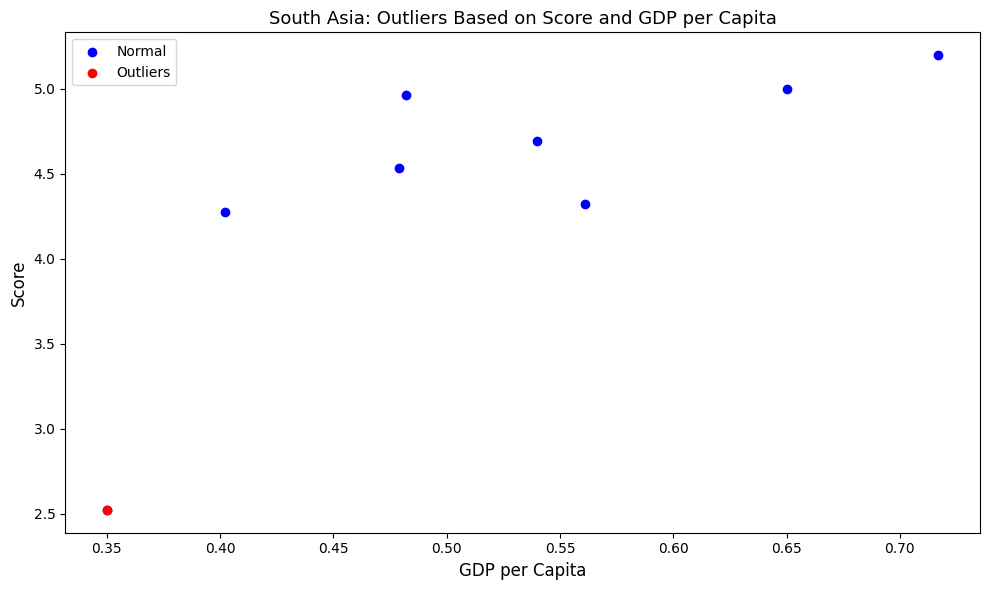


Outliers in Middle East:
Empty DataFrame
Columns: [Country name, Score, GDP per Capita, Social Support, Healthy Life Expectancy, Freedom to Make Life Choices, Generosity]
Index: []


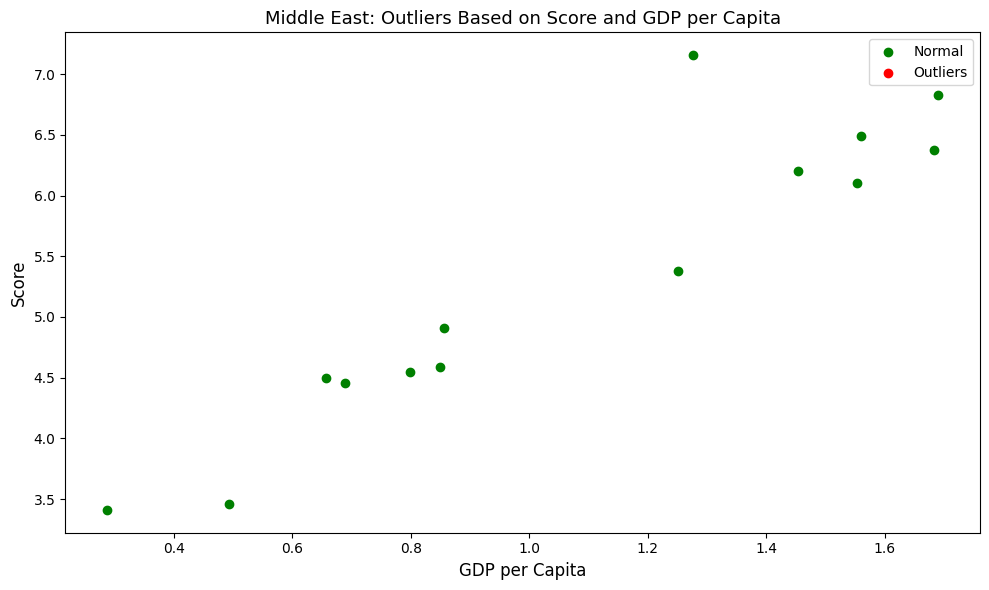

In [ ]:
for region, df in [("South Asia", south_asia_df), ("Middle East", middle_east_df)]:
    Q1 = df["Score"].quantile(0.25)
    Q3 = df["Score"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df["Score"] < lower_bound) | (df["Score"] > upper_bound)]
    print(f"\nOutliers in {region}:")
    print(outliers)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df["GDP per Capita"], df["Score"], color="blue" if region == "South Asia" else "green", label="Normal")
    plt.scatter(outliers["GDP per Capita"], outliers["Score"], color="red", label="Outliers")
    plt.title(f"{region}: Outliers Based on Score and GDP per Capita", fontsize=13)
    plt.xlabel("GDP per Capita", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


**7. Visualization:**

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

=> Boxplots for Score Distribution**


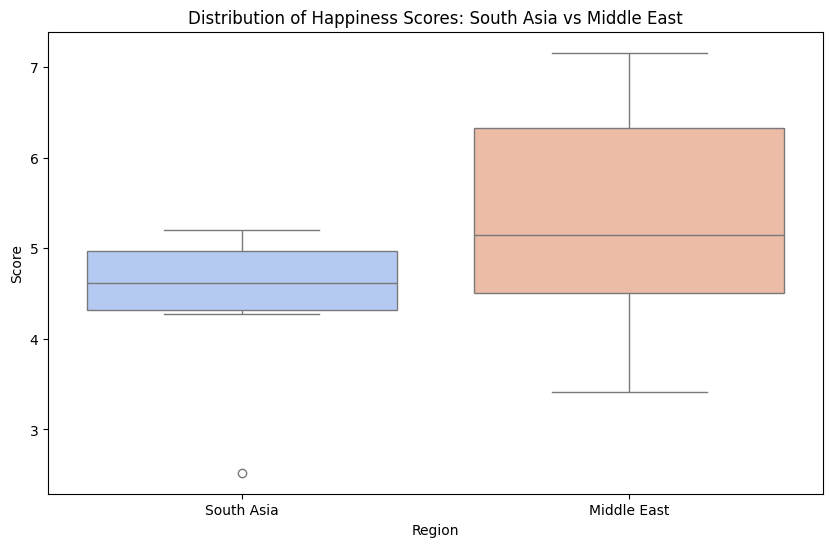

In [ ]:
# Add a new column to label the region for each country
south_asia_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

# Combine both regions into one DataFrame
# Change 'score' to 'Score' to match the actual column name
combined_df = pd.concat([south_asia_df[['Country name', 'Region', 'Score']],
                         middle_east_df[['Country name', 'Region', 'Score']]])

# Set up the plot for comparing the distribution of Score between South Asia and Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Score', data=combined_df, hue='Region', palette='coolwarm')

# Add title and labels
plt.title('Distribution of Happiness Scores: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')

# Show the plot
plt.show()  # Add plt.show() to display the plot if not already present